# 图像平滑滤波

图像在生成、传输或存储过程中可能因为外界干扰产生噪声，从而使图像在视觉上表现为出现一些孤立点或者像素值突然变化的点，图像平滑处理的目的就是为了消除图像中的这类噪声  


图像锐化就是增强图像的边缘或轮廓。
对图像边缘锐化：突出图像中的细节，或者增强被模糊的细节【如经过均值滤波后的图像】，具体的说，补偿图像的轮廓，增强图像边缘及灰度跳变的部分，使图像变得更清晰。


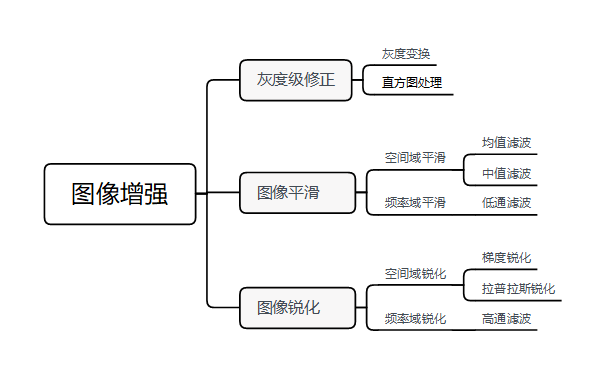 
均值滤波采用线性的方法，平均整个窗口范围内的像素值。
均值滤波本身存在着固有的缺陷，即它不能很好地保护图像细节，在图像去噪的同时也破坏了图像的细节部分，从而使图像变得模糊，不能很好地去除噪声点。
均值滤波对高斯噪声表现较好，对椒盐噪声表现较差

中值滤波：用局部邻域（窗口）里的中值来代替上述局部平均法中的局部平均值 。
中值滤波采用非线性的方法，它在平滑脉冲噪声方面非常有效,同时它可以保护图像尖锐的边缘，选择适当的点来替代污染点的值，所以处理效果好，对椒盐噪声表现较好，对高斯噪声表现较差。


###  1.1 2D卷积 
OpenCV提供了一个函数cv.filter2D()来将卷积核与图像进行卷积。例如，我们将尝试对图像进行平均滤波。下面是一个5x5平均滤波器的核：

$$ K=\frac{1}{25}\begin{bmatrix} \ 1\ \ 1 \ \ 1 \ \ 1\ \ 1\ \ 1\ \ 1 \ \ 1 \ \ 1\ \ 1\ \ 1\ \ 1 \ \ 1 \ \ 1\ \ 1\ \ 1\ \ 1 \ \ 1 \ \ 1\ \ 1\ \ 1\ \ 1 \ \ 1 \ \ 1\ \ 1 \end{bmatrix} $$

操作步骤如下：将此核放在一个像素A上，求与核对应的图像上 25（5x5）个像素的和，取其平均值并用新的平均值替换像素A的值。重复以上操作直到将图像的每一个像素值都更新一遍。

In [14]:
import warnings
warnings.filterwarnings("ignore") 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8,8) 
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)  

#解决中文显示问题
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

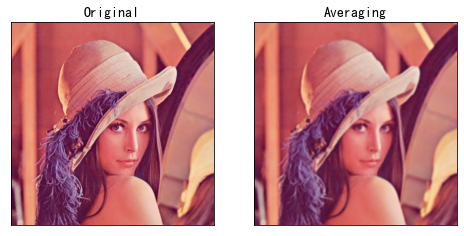

In [2]:
import numpy as np
import cv2 
from matplotlib import pyplot as plt

img = cv2.imread('./images/lena.jpg')

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

plt.subplot(121),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [3]:
kernel

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]], dtype=float32)

## 2 图像平滑
 
图像在生成、传输或存储过程中可能因为外界干扰产生噪声，从而使图像在视觉上表现为出现一些孤立点或者像素值突然变化的点，图像平滑处理的目的就是为了消除图像中的这类噪声。

它有助于消除噪音，从图像中去除了高频内容（例如：噪声，边缘）。因此在此操作中边缘会模糊一点。（有的平滑技术也不会平滑边缘）。OpenCV主要提供四种平滑技术。 

### 2.1 均值平滑blur() 
这是由一个归一化卷积框完成的。它取卷积核区域下所有像素的平均值并替换中心元素。 


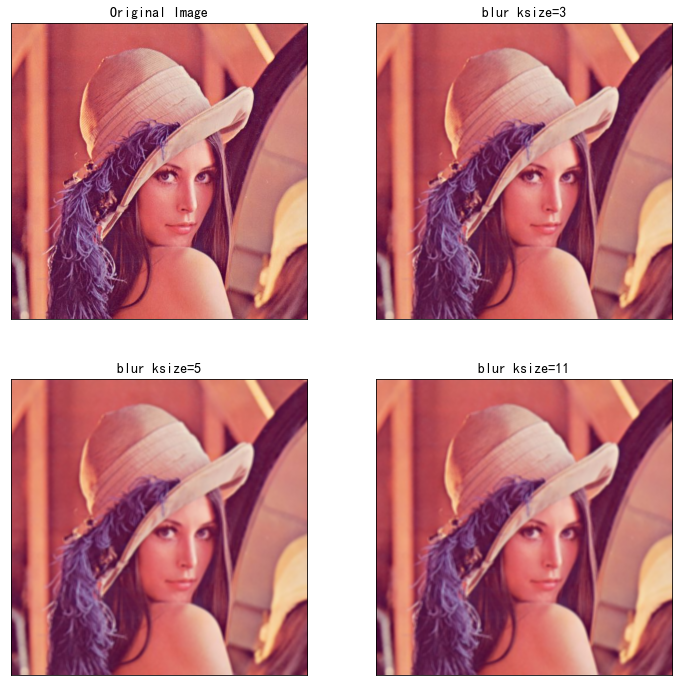

In [6]:

import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/lena.jpg')
img_ret1 = cv2.blur(img,(3,3))  # blur 
img_ret2 = cv2.blur(img,(5,5))
img_ret3 = cv2.blur(img,(11,11))


titles = ['Original Image', 'blur ksize=3',
          'blur ksize=5', 'blur ksize=11']
images = [img, img_ret1, img_ret2, img_ret2]

for i in range(len(images)):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()


### 2.2 中值滤波

函数cv.medianBlur()取卷积核区域下所有像素的中值，并用该中值替换中心元素。

这对去除图像中的椒盐噪声非常有效。


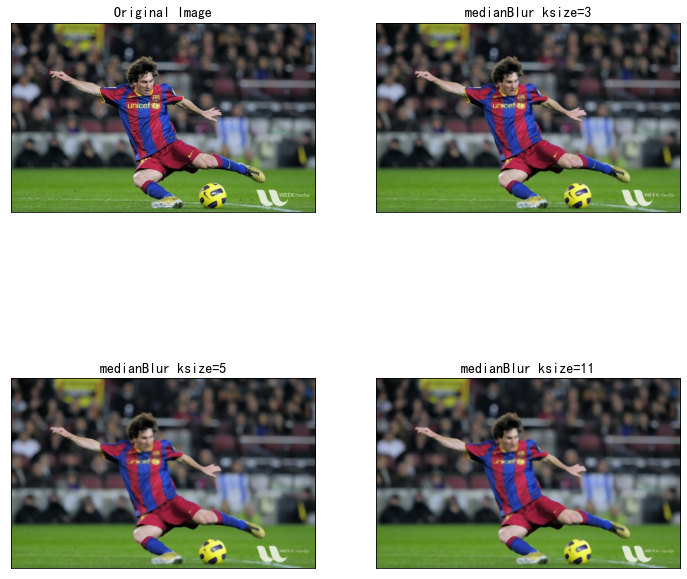

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/messi5.jpg')
img_ret1 = cv2.medianBlur(img,3)
img_ret2 = cv2.medianBlur(img,5)
img_ret3 = cv2.medianBlur(img,11)



titles = ['Original Image', 'medianBlur ksize=3',
          'medianBlur ksize=5', 'medianBlur ksize=11']
images = [img, img_ret1, img_ret2, img_ret2]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

以图像的水平方向坐标作为绘图的X轴，在上面这个lena图片中，X轴的取值范围就是0~511（图像宽度为512个像素）

提取第10行的像素值作为绘图的Y轴，因为是uint8（CV_8U）类型的数据，Y轴分布在0~255。

分别绘制原图、均值滤波和中值滤波后的像素值的曲线：

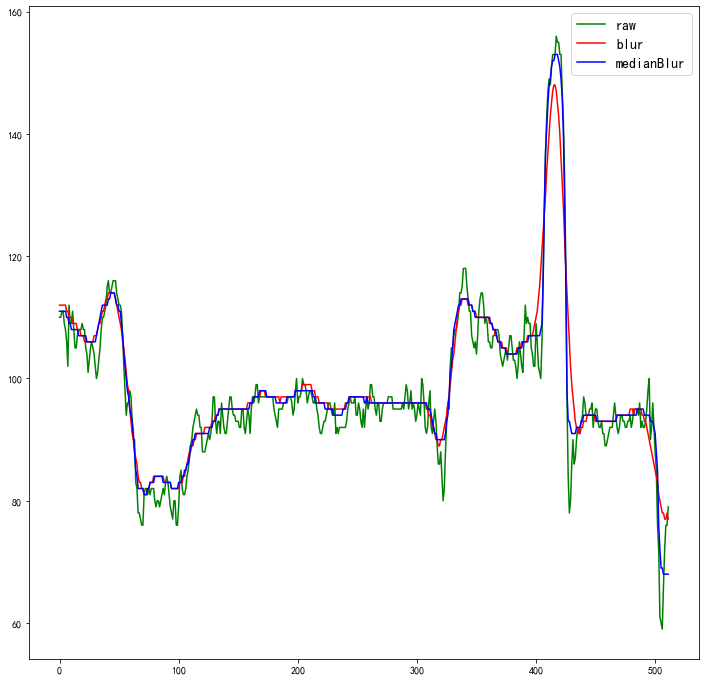

In [9]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2


img = cv2.imread('./images/lena.jpg')
img_ret1 = cv2.blur(img,(15,15)) 
img_ret2 = cv2.medianBlur(img,15)
 
X = np.arange(img.shape[1])  
Y = img[:,:,0][10,:]         #仅提取b通道第10行
Y1 = img_ret1[:,:,0][10,:]   #提取均值平滑后图像b通道的第10行
Y2 = img_ret2[:,:,0][10,:]   #提取中值平滑后图像b通道的第10行
plt.plot(X,Y,'-g',label='raw' ) #绘图
plt.plot(X,Y1,'-r',label='blur')
plt.plot(X,Y2,'-b',label='medianBlur')
plt.legend()
plt.show()

从上面的对比可以看到绿色的原始图像，其像素值变化的非常“剧烈”，有很多波峰或波谷，但是经过平滑处理后的像素值（红色和蓝色）则显得平滑的多。

**平滑处理是图像滤波的一种，可以看做是低通滤波，它会消除图像的高频“信号”，让图像看起来更模糊、平滑，通过将变化前后的图像像素值绘制曲线可以更形象地观察到这种平滑效果。** 

### 2.3 高斯平滑GaussianBlur()

在OpenCV的高斯平滑中用到的正态分布都是取μ=0,$\sigma$


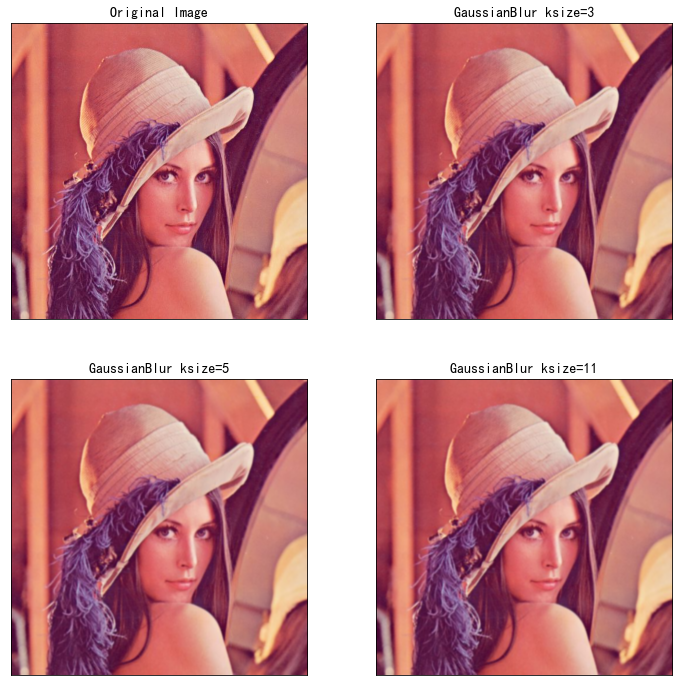

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/lena.jpg')
img_ret1 = cv2.GaussianBlur(img,(3,3),0)
img_ret2 = cv2.GaussianBlur(img,(5,5),0)
img_ret3 = cv2.GaussianBlur(img,(11,11),0)

titles = ['Original Image', 'GaussianBlur ksize=3',
          'GaussianBlur ksize=5', 'GaussianBlur ksize=11']
images = [img, img_ret1, img_ret2, img_ret2]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

从运行结果看，ksize越大，图像越模糊。

下面是ksize保持不变，sigmaX变化的例子

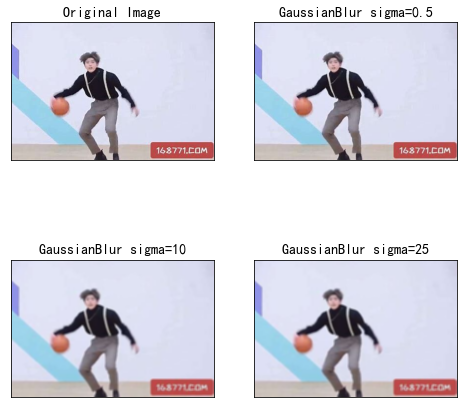

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/caixukun.jpg')
img_ret1 = cv2.GaussianBlur(img,(5,5),0.5)
img_ret2 = cv2.GaussianBlur(img,(5,5),10)
img_ret3 = cv2.GaussianBlur(img,(5,5),25)

titles = ['Original Image', 'GaussianBlur sigma=0.5',
          'GaussianBlur sigma=10', 'GaussianBlur sigma=25']
images = [img, img_ret1, img_ret2, img_ret2]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()

对应到高斯分布曲线的特性，当sigma越大时，原点的取值越小，周围点的取值更大，对应到图像上中心点的权重越低，周围点权重越高，所以sigma越大图像越模糊。 

### 2.4 双边平滑bilateralFilter() 
均值、中值、高斯平滑的去躁是一种“无差别攻击”，所有的像素都受到同一个加权系数的影响，所以在平滑过程中也会影响到图像的边沿（像素值突变的地方）

双边滤波则可以在去除噪声的同时又能保持图像的边沿，也就是传说中的”去噪保边”。

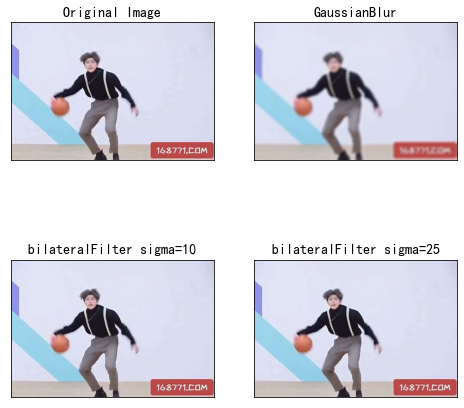

In [16]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./images/caixukun.jpg')
img_ret1 = cv2.GaussianBlur(img,(7,7),10)
img_ret2 = cv2.bilateralFilter(img,7,10,10)
img_ret3 = cv2.bilateralFilter(img,7,25,25)

titles = ['Original Image', 'GaussianBlur',
          'bilateralFilter sigma=10', 'bilateralFilter sigma=25']
images = [img, img_ret1, img_ret2, img_ret2]

for i in range(4):
    plt.subplot(2, 2, i + 1), plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])

plt.show()